# Linear regression

Import all the modules you will need in this notebook here:

In [1]:
# exercise 0
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd
import sys
import os
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [2]:
# exercise 1
#def get_path(filename):
   
    #prog_name = sys.argv[0]
    #if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
    #    return os.path.join(os.path.dirname(prog_name), "..", filename)
    #else:
    #    return filename
    
#fram = pd.read_csv(get_path('fram.txt'), sep='\t')
#fram.head()
fram = pd.read_csv('fram.txt', sep='\t')
fram.head()
# Summary of variables
variables_summary = fram.describe()
print("Summary of variables:")
print(variables_summary)


Summary of variables:
                ID          AGE          FRW          SBP       SBP10  \
count  1394.000000  1394.000000  1394.000000  1394.000000  767.000000   
mean   4737.184362    52.431133   105.365136   148.086083  148.040417   
std    1073.406896     4.781507    17.752489    28.022062   25.706664   
min    1070.000000    45.000000    52.000000    90.000000   94.000000   
25%    3890.250000    48.000000    94.000000   130.000000  130.000000   
50%    4821.000000    52.000000   103.000000   142.000000  145.000000   
75%    5641.750000    56.000000   114.000000   160.000000  160.000000   
max    6442.000000    62.000000   222.000000   300.000000  264.000000   

               DBP         CHOL          CIG          CHD        DEATH  \
count  1394.000000  1394.000000  1394.000000  1394.000000  1394.000000   
mean     90.135581   234.644907     8.029412     1.187948     1.700861   
std      14.226235    46.303822    11.584138     2.615976     3.203132   
min      50.000000    96

Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [3]:
# exercise 2
import pandas as pd

def rescale(series):
    mean = series.mean()
    std_dev = series.std()
    rescaled_series = (series - mean) / (2 * std_dev)
    return rescaled_series


Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [4]:
data = pd.Series([1, 2, 3, 4, 5])
rescaled_data = rescale(data)
print(rescaled_data)

0   -0.632456
1   -0.316228
2    0.000000
3    0.316228
4    0.632456
dtype: float64


In [5]:
# exercise 3
fram = pd.read_csv('fram.txt', sep='\t')

# Iterate through each column in the DataFrame
for column in fram.columns:
    # Skip non-numeric columns
    if fram[column].dtype != 'object':
        # Apply rescale function to the column series
        rescaled_series = rescale(fram[column])
        # Add the rescaled series to the original DataFrame with "s" appended to the column name
        fram[f"s{column}"] = rescaled_series

# Print the head of the modified DataFrame
print(fram.head())



     ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD  ...      sAGE  \
0  4988  female   57  135  186    NaN  120   150    0    1  ...  0.477764   
1  3001  female   60  123  165    NaN  100   167   25    0  ...  0.791473   
2  5079  female   54  115  140    NaN   90   213    5    0  ...  0.164056   
3  5162  female   52  102  170    NaN  104   280   15    0  ... -0.045083   
4  4672  female   45   99  185    NaN  105   326   20    0  ... -0.777070   

       sFRW      sSBP sSBP10      sDBP     sCHOL      sCIG      sCHD  \
0  0.834668  0.676501    NaN  1.049625 -0.914016 -0.346569 -0.035923   
1  0.496687  0.301796    NaN  0.346698 -0.730446  0.732493 -0.227056   
2  0.271367 -0.144281    NaN -0.004765 -0.233727 -0.130757 -0.227056   
3 -0.094779  0.391012    NaN  0.487283  0.489755  0.300868 -0.227056   
4 -0.179274  0.658658    NaN  0.522430  0.986475  0.516680 -0.227056   

     sDEATH  sYRS_DTH  
0  0.827181 -0.665514  
1  1.295472  0.099516  
2  0.983278 -0.410504  
3  0.827

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [6]:
# exercise 4
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot

fit=smf.ols('SBP ~ sFRW + SEX + sCHOL',
data=fram).fit()
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Mon, 20 May 2024   Prob (F-statistic):           4.13e-40
Time:                        11:15:45   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [7]:
# exercise 5
fit=smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE' ,
data=fram).fit()
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Mon, 20 May 2024   Prob (F-statistic):           2.44e-46
Time:                        11:15:45   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Including AGE in the model increased the R-quared value from 12.5% to 14.6%. The t-values reveal that sFRW and AGE have the most significant impact on the target variable (~12 and 5.8 respectively). Meanwhile, SEX and sCHOL have lower impact (-3.05 and 3.01 respectively). Taking the absolute value of the t-value takes both the magnitude of the coefficient (coeff) and its statistical significance (p-value) into account, and is generally a good measure of independant variable impact.

***

Try to add to the model all the interactions with other variables. 

In [8]:
# exercise 6

# Modify the formula 
formula = 'SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL'
#All possible factors: 'SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL + sDBP + sDBP:sFRW + sDBP:SEX + sDBP:sCHOL + sDBP:sAGE + sCIG + sCIG:sFRW + sCIG:SEX + sCIG:sCHOL + sCIG:sAGE + sCIG:sDBP + CHD + sYRS_CHD + sYRS_CHD:sFRW + sYRS_CHD:SEX + sYRS_CHD:sCHOL + sYRS_CHD:AGE + sYRS_CHD:sDBP + sYRS_CHD:sCIG'

# Fit the model
fit = smf.ols(formula, data=fram).fit()

# Print the summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Mon, 20 May 2024   Prob (F-statistic):           4.92e-43
Time:                        11:15:45   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

In [9]:

# Extract the significant variables excluding "Intercept" for a later "ideal" model
significant_vars = [var for var in fit.pvalues[fit.pvalues < 0.05].index.tolist() if var != 'Intercept']

# Create a DataFrame to store the results
significant_results = pd.DataFrame(columns=['Coefficient', 'Std Error', 't-value', 'P-value'])

# Populate the DataFrame with the significant variables' information
for var in significant_vars:
    significant_results.loc[var] = [fit.params[var], fit.bse[var], fit.tvalues[var], fit.pvalues[var]]

# Print the table
print(significant_results)


             Coefficient  Std Error   t-value       P-value
SEX[T.male]    -4.730869   1.450791 -3.260889  1.137687e-03
sFRW           16.644973   1.723004  9.660438  2.069712e-21
sAGE           10.218851   2.003267  5.101093  3.846056e-07


Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

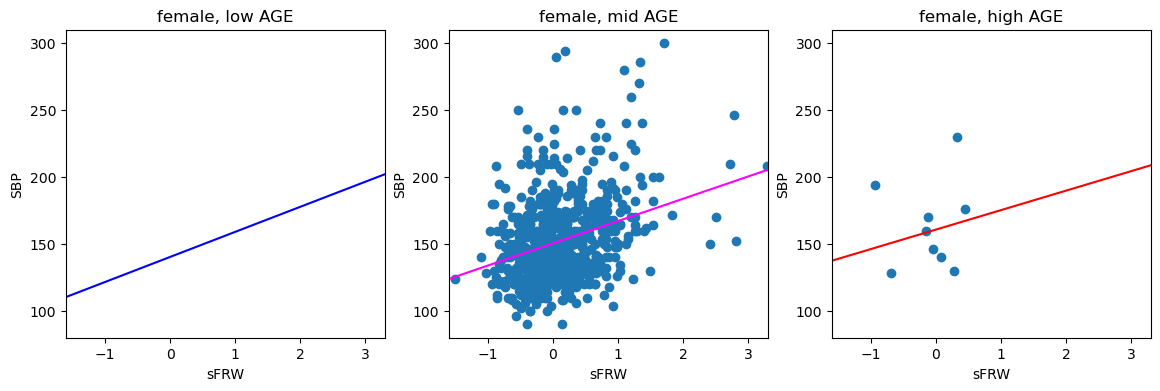

In [10]:
# exercise 7
p = fit.params
fig, ax = plt.subplots(1, 3, subplot_kw={"xlim": (-1.6, 3.3), "ylim": (80,310),
                                        "xlabel": "sFRW", "ylabel": "SBP"},
                       figsize=(14, 4))

ax[0].scatter(fram.sFRW[(fram.SEX=="female") & (fram.sAGE < -1.0)],
              fram.SBP[(fram.SEX=="female") & (fram.sAGE < -1.0)])
abline_plot(p.Intercept - p["sAGE"],
            p.sFRW - p["sAGE:sFRW"], color="blue", label="low", ax=ax[0])
ax[0].set_title("female, low AGE")

ax[1].scatter(fram.sFRW[(fram.SEX=="female") & (fram.sAGE > -1.0) &
                        (fram.sAGE < 1.0)],
              fram.SBP[(fram.SEX=="female") & (fram.sAGE > -1.0) &
                        (fram.sAGE < 1.0)])
abline_plot(p.Intercept, p.sFRW, color="magenta", label="mid", ax=ax[1])
ax[1].set_title("female, mid AGE")

ax[2].scatter(fram.sFRW[(fram.SEX=="female") & (fram.sAGE > 1.0)],
              fram.SBP[(fram.SEX=="female") & (fram.sAGE > 1.0)])
abline_plot(p.Intercept + p["sAGE"],
            p.sFRW + p["sAGE:sFRW"], color="red", label="high", ax=ax[2])
ax[2].set_title("female, high AGE")

plt.show()





How does the dependence of blood pressure on weight change as a person gets older?
***

SBP increases with AGE.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Mon, 20 May 2024   Prob (F-statistic):           2.99e-40
Time:                        11:15:46   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

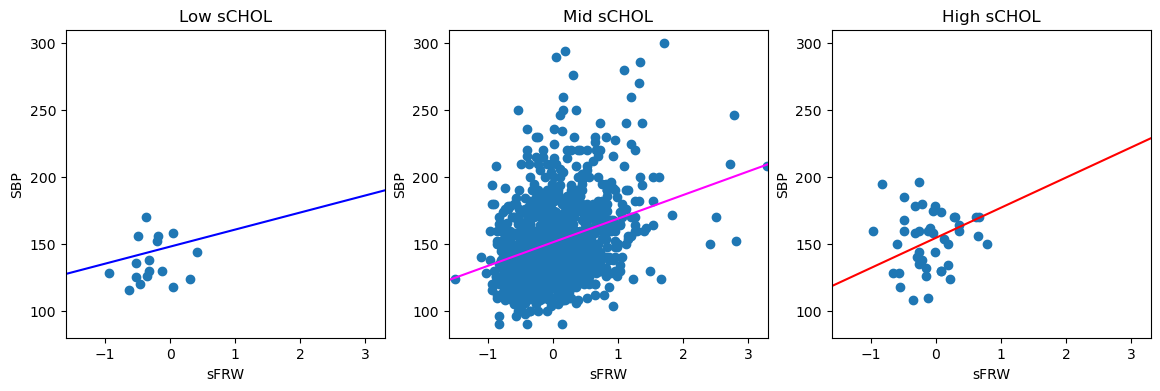

In [11]:
# exercise 8

# Modify the formula
formula = ('SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + '
           'sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL + sCIG + sCIG:sFRW + '
           'sCIG:SEX + sCIG:sCHOL + sCIG:sAGE')

# Fit the model
fit = smf.ols(formula, data=fram).fit()

# Print the summary
print(fit.summary())

# Extract the significant variables excluding "Intercept" for a later "ideal" model
significant_vars = [var for var in fit.pvalues[fit.pvalues < 0.05].index.tolist() if var != 'Intercept']

# Create a DataFrame to store the results
significant_results = pd.DataFrame(columns=['Coefficient', 'Std Error', 't-value', 'P-value'])

# Populate the DataFrame with the significant variables' information
for var in significant_vars:
    significant_results.loc[var] = [fit.params[var], fit.bse[var], fit.tvalues[var], fit.pvalues[var]]

# Print the table
print(significant_results)

# Save the significant results to a CSV file
significant_results.to_csv('significant_results.csv', index=False)

p = fit.params

# Find the most significant variable
most_significant_result = significant_results['Coefficient'].idxmax()

fig, ax = plt.subplots(1, 3, subplot_kw={"xlim": (-1.6, 3.3), "ylim": (80, 310),
                                        "xlabel": most_significant_result, "ylabel": "SBP"},
                       figsize=(14, 4))

print("The most significant factor is:", most_significant_result)

# Plotting SBP against the most relevant factor
ax[0].scatter(fram[most_significant_result][fram.sCHOL < -1.0],
              fram.SBP[fram.sCHOL < -1.0])
abline_plot(p.Intercept - p["sCHOL"],
            p[most_significant_result] - p["sCHOL:sFRW"], color="blue", label="low", ax=ax[0])
ax[0].set_title("Low sCHOL")

ax[1].scatter(fram[most_significant_result][(fram.sCHOL > -1.0) & (fram.sCHOL < 1.0)],
              fram.SBP[(fram.sCHOL > -1.0) & (fram.sCHOL < 1.0)])
abline_plot(p.Intercept, p[most_significant_result], color="magenta", label="mid", ax=ax[1])
ax[1].set_title("Mid sCHOL")

ax[2].scatter(fram[most_significant_result][fram.sCHOL > 1.0],
              fram.SBP[fram.sCHOL > 1.0])
abline_plot(p.Intercept + p["sCHOL"],
            p[most_significant_result] + p["sCHOL:sFRW"], color="red", label="high", ax=ax[2])
ax[2].set_title("High sCHOL")

plt.show()





How does the model and its accuracy look?

***

There are many variables with high P-values. These should be removed from a final model.

***

# Logistic regression

In [12]:
def logistic_transform(x):
    return 1.0 / (1.0 + np.exp(x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

                          Generalized Linear Model Regression Results                          
Dep. Variable:     ['HIGH_BP[False]', 'HIGH_BP[True]']   No. Observations:                 1394
Model:                                             GLM   Df Residuals:                     1390
Model Family:                                 Binomial   Df Model:                            3
Link Function:                                   Logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -856.87
Date:                                 Mon, 20 May 2024   Deviance:                       1713.7
Time:                                         11:15:47   Pearson chi2:                 1.39e+03
No. Iterations:                                      4   Pseudo R-squ. (CS):            0.06351
Covariance Type:                             nonrobust                                         
                       coef    std err  

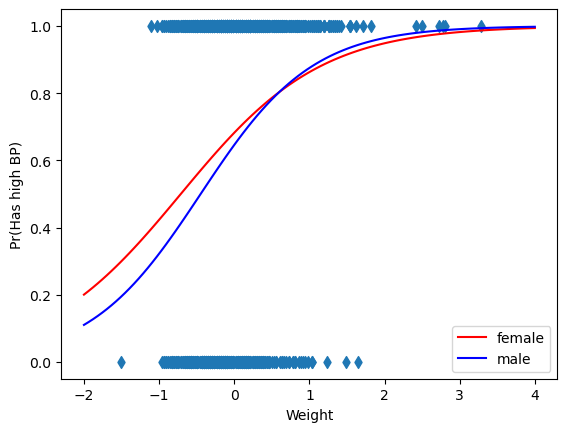

In [13]:
# exercise 9
points = pd.read_csv('points.csv')

#defining what we diagnose as high blood pressure
points["HIGH_BP"] = (points.SBP >= 140) | (points.DBP >= 90)
points.HIGH_BP.head()

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=points,
            family=sm.families.Binomial(sm.families.links.Logit())).fit()
fit.summary()
print(fit.summary())

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & points.HIGH_BP) |
((fit.fittedvalues > 0.5) & ~points.HIGH_BP))
print("Fraction of mispredictions", error_rate_orig)
print("Base rate:", 1-np.mean(points.HIGH_BP))

plt.scatter(points.sFRW, points.HIGH_BP, marker="d")
X=np.linspace(-2, 4, 100)
p = fit.params
plt.plot(X, logistic_transform(X*p.sFRW + p.Intercept), color="red", label="female")
plt.plot(X, logistic_transform(X*(p.sFRW + p["SEX[T.male]:sFRW"]) +
p["SEX[T.male]"] + p.Intercept), color="blue",label="male")
plt.xlabel("Weight")
plt.ylabel("Pr(Has high BP)")
plt.legend();
plt.show()


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [14]:
# exercise 10
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data=points,
            family=sm.families.Binomial(sm.families.links.Logit())).fit()
fit.summary()
print(fit.summary())

error_rate = np.mean(((fit.fittedvalues < 0.5) & points.HIGH_BP) |
((fit.fittedvalues > 0.5) & ~points.HIGH_BP))
print("Fraction of mispredictions", error_rate)
print("Base rate:", 1-np.mean(points.HIGH_BP))


                          Generalized Linear Model Regression Results                          
Dep. Variable:     ['HIGH_BP[False]', 'HIGH_BP[True]']   No. Observations:                 1394
Model:                                             GLM   Df Residuals:                     1387
Model Family:                                 Binomial   Df Model:                            6
Link Function:                                   Logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -845.51
Date:                                 Mon, 20 May 2024   Deviance:                       1691.0
Time:                                         11:15:48   Pearson chi2:                 1.39e+03
No. Iterations:                                      4   Pseudo R-squ. (CS):            0.07865
Covariance Type:                             nonrobust                                         
                       coef    std err  

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

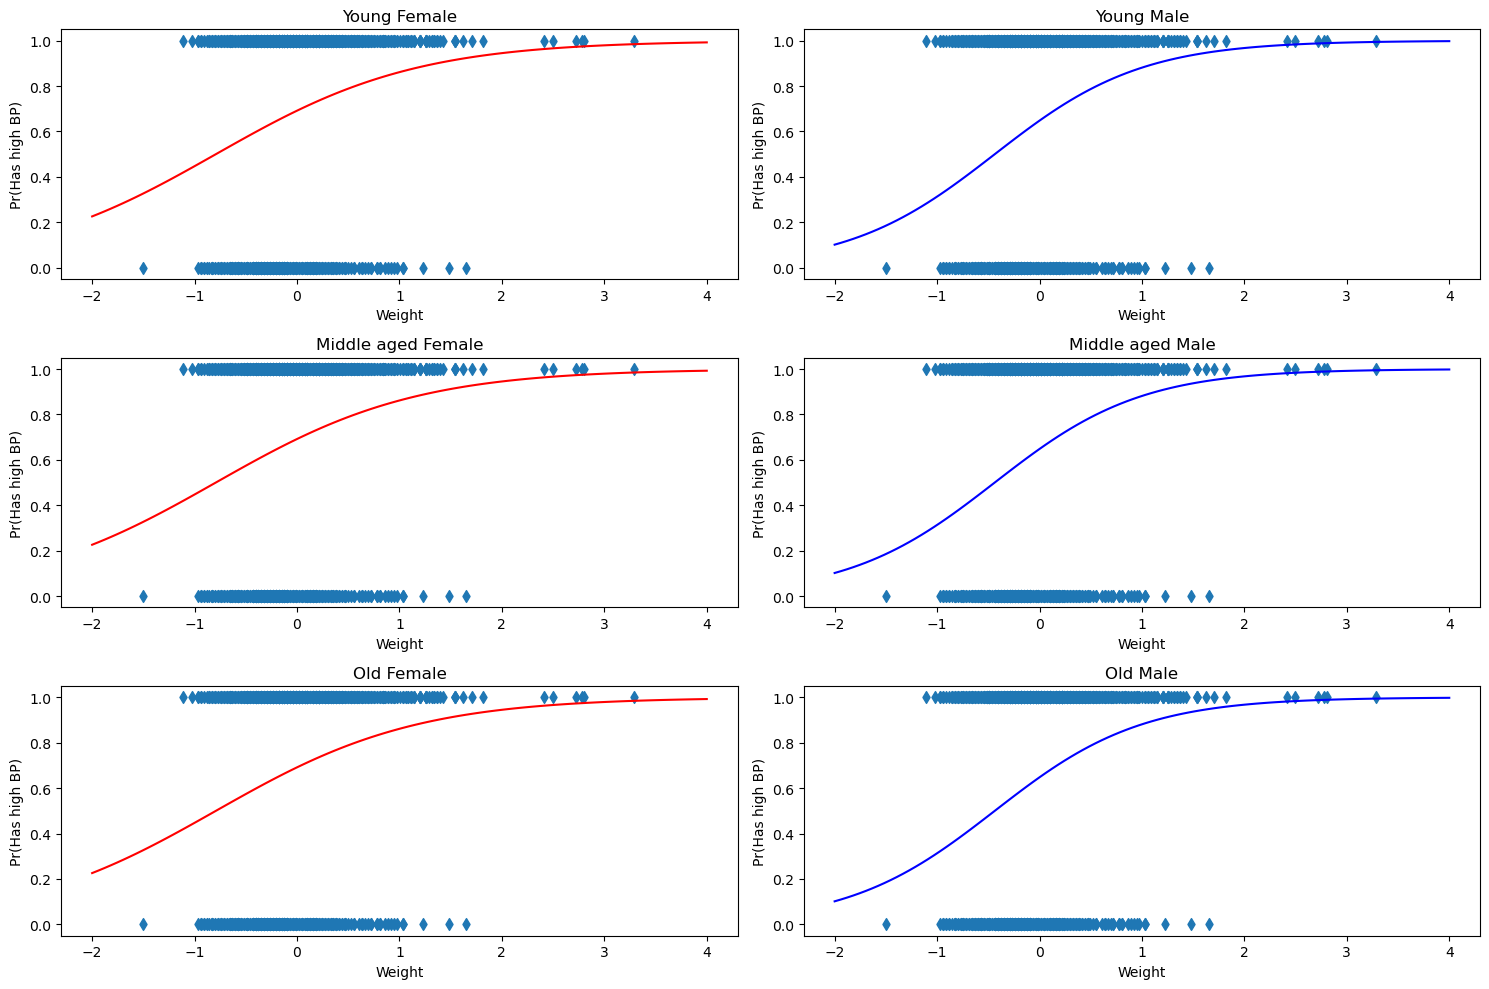

In [15]:
# exercise 11

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Age groups
age_groups = ['young', 'middle aged', 'old']

# Genders
genders = ['female', 'male']

# Iterate over each age group
for i, age_group in enumerate(age_groups):
    
    
    X=np.linspace(-2, 4, 100)
    # Filter points DataFrame by age group
    age_group_filtered_points = points[points['sAGE'] == age_group]

    for j, gender in enumerate(genders):
        # Filter points DataFrame by gender
        gender_filtered_points = age_group_filtered_points[age_group_filtered_points['SEX'] == gender]
        
        # Get parameters for the logistic regression model
        p = fit.params
        
        # Plot logistic regression curve for female
        if gender == 'female':
            axes[i, j].plot(X, logistic_transform(X * p.sFRW + p.Intercept), color="red", label="female")
        
        # Plot logistic regression curve for male
        if gender == 'male':
            axes[i, j].plot(X, logistic_transform(X * (p.sFRW + p["SEX[T.male]:sFRW"]) +
                                                   p["SEX[T.male]"] + p.Intercept), color="blue", label="male")
        
        # Plot model data points
        axes[i, j].scatter(points.sFRW, points.HIGH_BP, marker="d")
        
        # Set labels and title
        axes[i, j].set_xlabel("Weight")
        axes[i, j].set_ylabel("Pr(Has high BP)")
        axes[i, j].set_title(f"{age_group.capitalize()} {gender.capitalize()}")


# Adjust layout
plt.tight_layout()
# Show plot
plt.show()






How do the models with different ages and genders differ from each other?

***
Men are more at risk than women when it comes to increasing weight. Increasing age has a small effect on both men and women.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [16]:
# exercise 12
def train_test_split(df):
    train, test = train_test_split(df, train_size=0.8)
    return train, test

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [17]:
# exercise 13
from sklearn.model_selection import train_test_split

error_model=[]
error_null=[]
np.random.seed(9)
for i in range(100):
    train, test = train_test_split(points, train_size=0.8)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data=train,
    family=sm.families.Binomial()).fit()
    #print(model.summary())
    pred = fit.predict(test)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) |
    ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1-test.HIGH_BP).mean())

print(fit.summary())    
#for model, null in zip(error_model, error_null):
# print(model, null)
pd.Series(error_model).mean(), pd.Series(error_null).mean()

print(statsmodels.stats.stattools.stats.mannwhitneyu(error_model, error_null,
alternative="two-sided"))

                          Generalized Linear Model Regression Results                          
Dep. Variable:     ['HIGH_BP[False]', 'HIGH_BP[True]']   No. Observations:                 1115
Model:                                             GLM   Df Residuals:                     1108
Model Family:                                 Binomial   Df Model:                            6
Link Function:                                   Logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -675.68
Date:                                 Mon, 20 May 2024   Deviance:                       1351.4
Time:                                         11:15:54   Pearson chi2:                 1.11e+03
No. Iterations:                                      4   Pseudo R-squ. (CS):            0.07088
Covariance Type:                             nonrobust                                         
                       coef    std err  

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [21]:
# exercise 14

# Adding a new column 'hasCHD' to the DataFrame
fram['hasCHD'] = 0

# Looping through each row in the DataFrame to check 'CHD' values
for index, row in fram.iterrows():
    if row['CHD'] > 0:
        fram.at[index, 'hasCHD'] = 1
    else:
        fram.at[index, 'hasCHD'] = 0

print(fram)

# Compute the mean of the 'hasCHD' column
positive_cases_mean = fram['hasCHD'].mean()

print("Proportion of positive cases:", positive_cases_mean)


        ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD  ...      sFRW  \
0     4988  female   57  135  186    NaN  120   150    0    1  ...  0.834668   
1     3001  female   60  123  165    NaN  100   167   25    0  ...  0.496687   
2     5079  female   54  115  140    NaN   90   213    5    0  ...  0.271367   
3     5162  female   52  102  170    NaN  104   280   15    0  ... -0.094779   
4     4672  female   45   99  185    NaN  105   326   20    0  ... -0.179274   
...    ...     ...  ...  ...  ...    ...  ...   ...  ...  ...  ...       ...   
1389  4132    male   51  100  160    NaN   98   216   30    0  ... -0.151109   
1390  5418    male   50   95  174    NaN  106   192    5    0  ... -0.291935   
1391  6260    male   57   88  144    NaN   96   184   20    0  ... -0.489090   
1392  5786    male   62   87  156    NaN   90   255    0    0  ... -0.517255   
1393  6071    male   45   83  156    NaN   90   255   15    0  ... -0.629916   

          sSBP  sSBP10      sDBP     sC

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [22]:
# exercise 15
#fit = smf.glm(formula="hasCHD ~ sFRW +sCHOL +sCIG + sFRW:sCHOL +sFRW:sCIG +sCHOL:sCIG", data=fram,
            #family=sm.families.Binomial(sm.families.links.Logit())).fit()
#fit.summary()
#print(fit.summary())

error_model = []
error_null = []
np.random.seed(9)
for i in range(100):
    train, test = train_test_split(fram, train_size=0.8)
    fit = smf.glm(formula="hasCHD ~ sFRW + sCHOL + sCIG + sFRW:sCHOL + sFRW:sCIG + sCHOL:sCIG", data=train,
    family=sm.families.Binomial()).fit()
    pred = fit.predict(test)
    error_rate = np.mean(((pred < 0.5) & (test.hasCHD == 1)) |
    ((pred > 0.5) & (test.hasCHD == 0)))
    error_model.append(error_rate)
    error_null.append((1 - test.hasCHD).mean())
  
print(fit.summary())
print("The error rate is:\n", error_rate)
print(statsmodels.stats.stattools.stats.mannwhitneyu(error_model, error_null,
alternative="two-sided"))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1115
Model:                            GLM   Df Residuals:                     1108
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -588.40
Date:                Mon, 20 May 2024   Deviance:                       1176.8
Time:                        11:16:27   Pearson chi2:                 1.11e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01978
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2377      0.074    -16.714      0.0

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


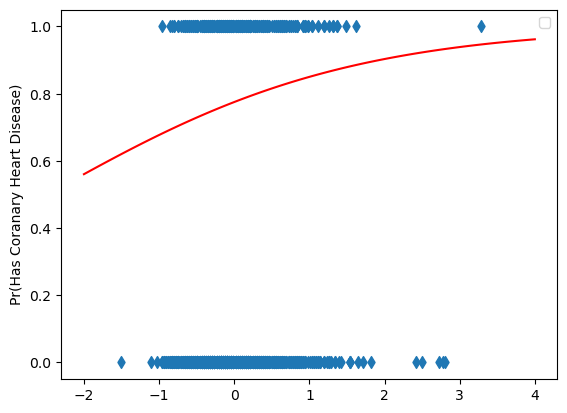

In [26]:
# exercise 16
plt.scatter(points.sFRW, points.hasCHD, marker="d")
X=np.linspace(-2, 4, 100)

p = fit.params
plt.plot(X, logistic_transform(-X*p.sCIG + p.Intercept), color="red")

plt.ylabel("Pr(Has Coranary Heart Disease)")
plt.legend();
plt.show()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
With an error rate of 0.186, 18.6% of the predictions are incorrect. While this isn't ideal, it is still useful, and hopefully we can refine this further.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

     ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD  ...     ssFRW  \
0  4988  female   57  135  186    NaN  120   150    0    1  ...  0.834668   
1  3001  female   60  123  165    NaN  100   167   25    0  ...  0.496687   
2  5079  female   54  115  140    NaN   90   213    5    0  ...  0.271367   
3  5162  female   52  102  170    NaN  104   280   15    0  ... -0.094779   
4  4672  female   45   99  185    NaN  105   326   20    0  ... -0.179274   

      ssSBP  ssSBP10     ssDBP    ssCHOL     ssCIG     ssCHD   ssDEATH  \
0  0.676501      NaN  1.049625 -0.914016 -0.346569 -0.035923  0.827181   
1  0.301796      NaN  0.346698 -0.730446  0.732493 -0.227056  1.295472   
2 -0.144281      NaN -0.004765 -0.233727 -0.130757 -0.227056  0.983278   
3  0.391012      NaN  0.487283  0.489755  0.300868 -0.227056  0.827181   
4  0.658658      NaN  0.522430  0.986475  0.516680 -0.227056  1.295472   

   ssYRS_DTH   shasCHD  
0  -0.665514  0.940502  
1   0.099516 -0.265625  
2  -0.410504 -0.2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1115
Model:                            GLM   Df Residuals:                     1108
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -588.40
Date:                Mon, 20 May 2024   Deviance:                       1176.8
Time:                        11:16:38   Pearson chi2:                 1.11e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01978
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2377      0.074    -16.714      0.0

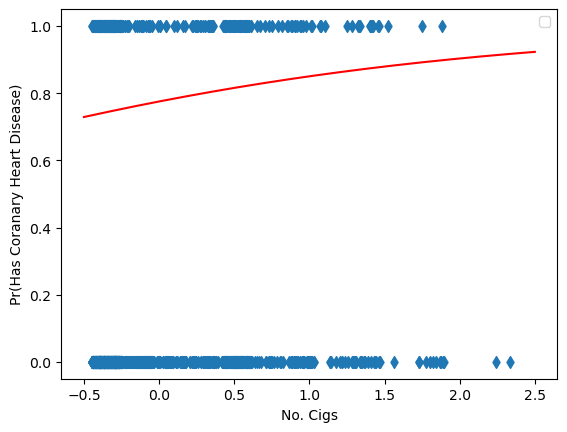

Initial fram_and_point is:         ID     SEX   AGE  FRW    SBP  SBP10    DBP  CHOL  CIG  CHD  ...  \
0  4988.0  female  57.0  135  186.0    NaN  120.0   150    0  1.0  ...   
1  3001.0  female  60.0  123  165.0    NaN  100.0   167   25  0.0  ...   
2  5079.0  female  54.0  115  140.0    NaN   90.0   213    5  0.0  ...   
3  5162.0  female  52.0  102  170.0    NaN  104.0   280   15  0.0  ...   
4  4672.0  female  45.0   99  185.0    NaN  105.0   326   20  0.0  ...   

       sFRW      sSBP  sSBP10      sDBP     sCHOL      sCIG      sCHD  \
0  0.834668  0.676501     NaN  1.049625 -0.914016 -0.346569 -0.035923   
1  0.496687  0.301796     NaN  0.346698 -0.730446  0.732493 -0.227056   
2  0.271367 -0.144281     NaN -0.004765 -0.233727 -0.130757 -0.227056   
3 -0.094779  0.391012     NaN  0.487283  0.489755  0.300868 -0.227056   
4 -0.179274  0.658658     NaN  0.522430  0.986475  0.516680 -0.227056   

     sDEATH  sYRS_DTH  hasCHD  
0  0.827181 -0.665514     1.0  
1  1.295472  0.099516   

In [25]:
# exercise 17
#Initialize a new DataFrame called "points" with the same columns and data as "fram"
points = fram.copy()

# Iterate through each column in the DataFrame
for column in fram.columns:
    # Skip non-numeric columns
    if fram[column].dtype != 'object':
        # Apply rescale function to the column series
        rescaled_series = rescale(fram[column])
        # Add the rescaled series to the new DataFrame with "s" appended to the column name
        points[f"s{column}"] = rescaled_series
print(points.head())

# Best Cross-Validation Model ----------------------------------------------------------------------------------------
# Adding a new column 'hasCHD' to the DataFrame
points['hasCHD'] = 0

# Looping through each row in the DataFrame to check 'CHD' values
for index, row in points.iterrows():
    if row['CHD'] > 0:
        points.at[index, 'hasCHD'] = 1
    else:
        points.at[index, 'hasCHD'] = 0

print(points)

# Compute the mean of the 'hasCHD' column
positive_cases_mean = points['hasCHD'].mean()

print("Proportion of positive cases:", positive_cases_mean)

error_model = []
error_null = []
np.random.seed(9)
for i in range(100):
    train, test = train_test_split(points, train_size=0.8)
    fit = smf.glm(formula="hasCHD ~ sFRW + sCHOL + sCIG + sFRW:sCHOL + sFRW:sCIG + sCHOL:sCIG", data=train,
    family=sm.families.Binomial()).fit()
    pred = fit.predict(test)
    error_rate = np.mean(((pred < 0.5) & (test.hasCHD == 1)) |
    ((pred > 0.5) & (test.hasCHD == 0)))
    error_model.append(error_rate)
    error_null.append((1 - test.hasCHD).mean())

print(fit.summary())
print("The error rate is:\n", error_rate)
print(statsmodels.stats.stattools.stats.mannwhitneyu(error_model, error_null,
alternative="two-sided"))

plt.scatter(points.sCIG + np.random.uniform(-0.1, 0.1, len(points)), points.hasCHD, marker="d")
X=np.linspace(-0.5, 2.5, 1000)
p = fit.params
plt.plot(X, logistic_transform(-X*p.sCIG + p.Intercept), color="red")

plt.xlabel("No. Cigs")
plt.ylabel("Pr(Has Coranary Heart Disease)")
plt.legend();
plt.show()

#If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that--------------------------
#  he/she sometimes shows signs of coronal hear disease?--------------------------------------------------------------------------------------

# Prediction for individual data point--------------------------------------------------------------------------------------------------------
point = pd.DataFrame({
    'FRW': [100],  # Weight (kg)
    'CHOL': [200], # Cholesterol (mg/dl)
    'CIG': [17]    # Units
})

# Display the DataFrame
#print("Original point", point)
#print("Original fram", fram.head())

# Concatenate fram on top of point
fram_and_point = pd.concat([fram, point], axis=0, ignore_index=True)

# Print the resulting dataframe
#print("fram_and_point dataframe after concatenation:")

print("Initial fram_and_point is: ", fram_and_point.head())

# Iterate through each column in the DataFrame
for column in fram_and_point.columns:
    # Skip non-numeric columns
    if fram_and_point[column].dtype != 'object':
        # Apply rescale function to the column series
        series = rescale(fram_and_point[column])
        # Add the rescaled series to the original DataFrame with "s" appended to the column name
        fram_and_point[f"s{column}"] = series

print("Final fram_and_point is: ", fram_and_point.head())

#rename fram_and_point to point
point = fram_and_point

# Extract final row as a new DataFrame without preserving the index
final_row = point.iloc[[-1]].reset_index(drop=True).copy()

# Use the fitted model to predict the probability of dangerously high blood pressure
individual_pred = fit.predict(final_row)

predicted = individual_pred[0]
print("Probability of showing signs of heart disease:", predicted)  # Accessing the predicted value directly
print("The error rate is :", error_rate)